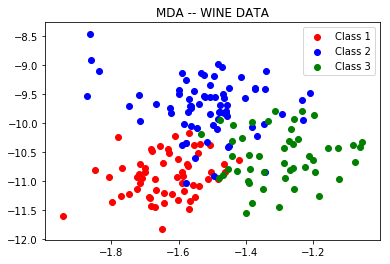

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
d=pd.read_csv('wine.txt',header=None)
def fun(a):
        return np.mean(a)
data=np.array(d.loc[:,1:])
mean=np.apply_along_axis(fun,0,data)
c1=np.array(d.loc[d[0]==1])
c1=c1[:,1:]
c2=np.array(d.loc[d[0]==2])
c2=c2[:,1:]
c3=np.array(d.loc[d[0]==3])
c3=c3[:,1:]
def covariance(mat):
    mean=np.apply_along_axis(fun,0,mat)
    mat_u=mat-mean
    mat_u_t=np.transpose(mat_u)
    shape=mat.shape[0]
    covariance=(np.matmul(mat_u_t,mat_u))/shape
    return mean, covariance
mean1, cov1=covariance(c1)
mean2, cov2=covariance(c2)
mean3, cov3=covariance(c3)
sw=cov1+cov2+cov3
inv=np.linalg.inv(sw)
my_list=[[c1,mean1],[c2,mean2],[c3,mean3]]
sb=np.zeros((13,13))
for i in [0,1,2]:
    sub=my_list[i][1]-mean
    sub_t=np.transpose(sub)
    mul=(np.matmul(sub_t,sub))*my_list[i][0].shape[0]
    sb+=mul
z=np.matmul(inv,sb)
e,v=np.linalg.eig(z)
ei=np.argsort(-e)
e=np.sort(-e)*-1
su=np.sum(e)
v=v[:,ei]
eigenvector=pd.DataFrame(v,columns=e)
reduced_c1=np.matmul(c1,v[:,0:2]) 
reduced_c1_frame=pd.DataFrame(reduced_c1)
reduced_c2=np.matmul(c2,v[:,0:2]) 
reduced_c2_frame=pd.DataFrame(reduced_c2)
reduced_c3=np.matmul(c3,v[:,0:2]) 
reduced_c3_frame=pd.DataFrame(reduced_c3)
plt.scatter(reduced_c1[:,0],reduced_c1[:,1],c='red',label='Class 1')
plt.scatter(reduced_c2[:,0],reduced_c2[:,1],c='blue',label='Class 2')
plt.scatter(reduced_c3[:,0],reduced_c3[:,1],c='green',label='Class 3')
plt.legend()
plt.title('MDA -- WINE DATA')
plt.show()